<Body>


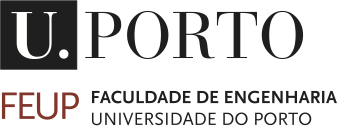   
<h1> <b>Machine Learning 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Andry Pinto** (amgp@fe.up.pt),
**Daniel Campos** (dfcampos@fe.up.pt),
**Maria Inês Pereira** (maria.ines@fe.up.pt)

FEUP, Feb. 2024

---


#Notebook 03: Linear Regression

## Introdution to a simple linear regression (using sklearn)

The most familiar linear regression, a straight-line fit to data, is a model of the form:
$$
y = mx + b
$$

*   $m$ is commonly known as the *slope*;
*   $b$ is commonly known as the *intercept*.

Consider the following data:

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from scipy import linalg
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

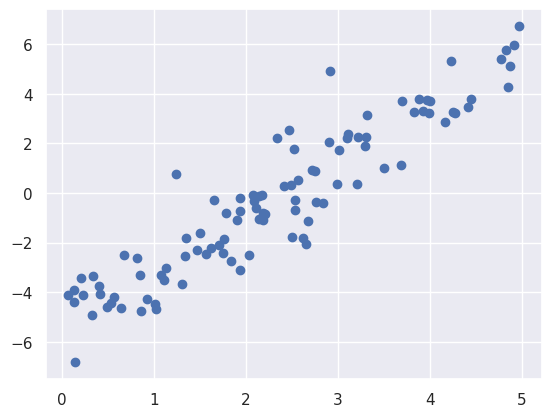

In [10]:
rng = np.random.RandomState(2)
x = 5 * rng.rand(100)
y = 2 * x - 5 + rng.randn(100)
#print(x.shape)
plt.scatter(x, y);

#Simple linear regression#
In this case $m$ and $b$ can be computed as follows:
\begin{equation}
{
m = \frac{\text{cross-covariance}}{variance}=\frac{\frac{\sum (x_i - \bar x)(y_i - \bar y)}{(n-1)}}{\frac{\sum ( x_i-\bar x)^2}{(n-1)}} =
\frac{\sum (x_i - \bar x)(y_i - \bar y)}{\sum ( x_i-\bar x)^2}
}
\end{equation}
and

\begin{equation}
{
b = \bar y - m \bar x
}
\end{equation}

where $\bar x$ and $\bar y$ are the (sample) mean of $x$ and $y$, respectively.


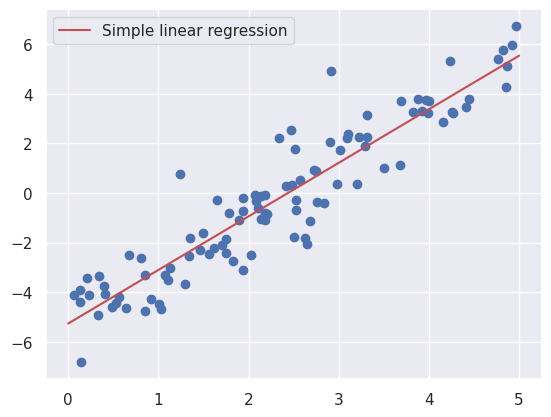

In [11]:
# Calculate the mean value of a list of numbers
def mean(values):
	return sum(values) / float(len(values))

 # Calculate Cross covariance between x and y (covariance without dividing by n-1)
def crosscovariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar

# Calculate the variance of a list of numbers (not dividing by n-1)
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])

def coefficients(x,y):
	x_mean, y_mean = mean(x), mean(y)
	m = crosscovariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b = y_mean - m * x_mean
	return [b, m]

b, m =  coefficients(x,y) #Simple linear regression
print()
aux=np.array([0,5])
plt.plot(aux, m*aux + b, "-r", label='Simple linear regression')
plt.legend()
plt.scatter(x, y);
plt.show()


In [12]:
print("Model slope:    ", m)
print("Model intercept:", b)

Model slope:     2.159045199680323
Model intercept: -5.258938832990868


[Scikit-Learn](https://scikit-learn.org) has a ``LinearRegression`` estimator that fit this data and constructs the best-fit line:


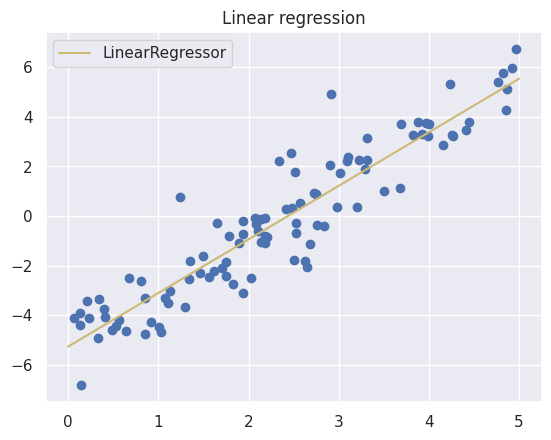

In [13]:
# see: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
model = LinearRegression(fit_intercept=True)

# Fit model based on data
model.fit(x[:, np.newaxis], y)

# Data for the line
xfit = np.linspace(0, 5, 1000)
# Use the model
yfit = model.predict(xfit[:, np.newaxis])

#Plot training set
plt.scatter(x, y)
#Plot regression line
plt.plot(xfit, yfit, 'y', label='LinearRegressor');
plt.legend()
plt.title('Linear regression');

The slope (``coef_``) and intercept (``intercept_``) of the data are contained in the model's fit parameters which are marked by a trailing underscore.

In [7]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.1590451996803215
Model intercept: -5.258938832990865


## Linear regression:

The ``LinearRegression`` estimator can be used to fit multidimensional linear models of the form:

\begin{equation}
\color{green}
{
\hat y = \theta_0 + \theta_1 x^{(1)} + \theta_2 x^{(2)} + \cdots + + \theta_d x^{(d)}
}
\end{equation}

The goal of the regression task is to estimate the parameter vector $\mathbf{\theta}$ that models the relationship of a dependent random variable $y$ based on random variables $x^{(1)}, x^{(2)}, \cdots, x^{(d)}$ that form the observation vector $\mathbf{x}$.


The notation that is being used:

*   $\theta_0$ is known as the bias or the intercept.
*   $x^{(4)}$ means the value of the 4$^{th}$ feature of the observation vector $\mathbf{x} \in \mathbb{R}^d$, which is a column vector.
*   $\mathbf{x_n}$ means the n$^{th}$ observation of the vector  $\mathbf{x_n} = [x_n^{(1)}, x_n^{(2)}, \cdots, x_n^{(d)} ] ^T$.

The intercept term $\theta_0$ can be absorved by the vector $\mathbf{\theta} = [\color{red}{\theta_0}, \theta_1, \theta_2, ⋯, \theta_d ]^T$ however, the dimension of $\mathbf{x}$ needs also to increase by adding the constant 1 as the first element and thus, $\mathbf{x} =  [\color{red}{1}, x^{(1)}, x^{(2)}, \cdots, x^{(d)} ]^T$.

In this way, the previous equation can be rewritten as:

\begin{equation}
\color{green}
{
y = \mathbf{\theta}^T \mathbf{x}
}
\end{equation}


A set of observations ($y_n$, $\mathbf{x_n}$) can be used for modelling $\mathbf{\theta}$, by defining a loss (least squares) function  
$$
J(\theta) = \sum_{n=1}^N (y_n - \theta^\top x_n)^2 = \|Y - X \theta\|^2 = (Y - X \theta)^\top\, (Y - X \theta),
% $\mathbb{L} = (Y - X \theta)^T. (Y - X \theta)$,
$$
where

\begin{equation}
Y:=
\begin{bmatrix}
{y}_1\\
{y}_2 \\
\cdots \\
{y}_N
\end{bmatrix}, \quad
\mathbf{\theta}:=
\begin{bmatrix}
{\theta}_0\\
{\theta}_1\\
{\theta}_2 \\
\cdots \\
{\theta}_d
\end{bmatrix}
\end{equation}

\begin{equation}
X:=
\begin{bmatrix}
\mathbf{x}_1^T\\
\mathbf{x}_2^T \\
\cdots \\
\mathbf{x}_n^T
\end{bmatrix}
=
\begin{bmatrix}
1 & x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(d)}\\
1 & x_2^{(1)} & x_2^{(2)} & \cdots & x_2^{(d)}\\
\cdots & \cdots & \cdots & \cdots & \cdots \\
1 & x_N^{(1)} & x_N^{(2)} & \cdots & x_N^{(d)}\\
\end{bmatrix}
\end{equation}




1) A close form solution may be found if $(X^T X)^{-1}$ exists (this topic will be discussed next class in more detail) and by setting gradient of $J(\theta)$ to zero, that is, $\nabla J(\theta)= 0$. The solution is given by

\begin{equation}
\color{green}
{
\mathbf{\theta}^\star := (X^\top X)^{-1}X^\top Y
}
\end{equation}


2) Other possibility for estimating the vector $\mathbf{\theta}$ is to use the stochastic gradient descent (SGD) optimization, which is an iterative procedure that follows:


1. Random initialization of vector $\mathbf{\theta}$
2. Compute Loss $J(\cdot)$
3. Compute an estimate $\hat g(\cdot)$ of the gradient of the loss $\nabla J = 2(X^TX \mathbf{\theta} -X^TY)$
4.  Update the model $\theta_{k+1} = \theta_k - \eta \hat g(\theta_k)$, where $\eta$ is the learning rate (constant).
5. Repeat 2 to 4 until convergence (or stopping criteria are met).

**Note:** The computation of the gradient $\nabla J$ requires summing overall $N$ samples. For $N$ large, this process makes slower the standard gradient decent algorithm. The SGD is often faster because the gradient is approximated with a (random) sampling minibatch of $B << N$ samples to get
$\hat g \approx \frac{1}{B} \sum_{n\in \cal B} (\theta^\top x_n -y_n)x_n$. A common approach is even to make $B=1$ (a single sample), making SGD really fast. Note however that the SGD may require multiple passes through the data to find the optimum.


The [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) has a ``SGDRegressor`` estimator.


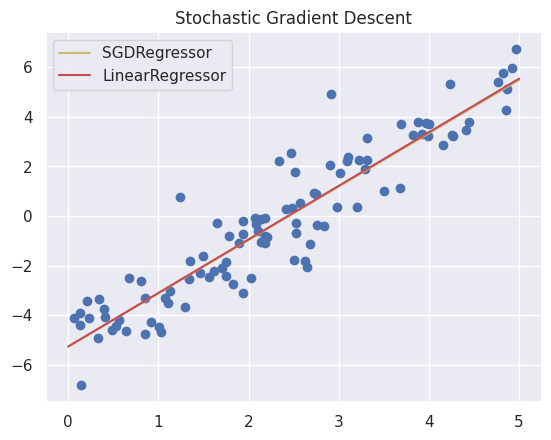

In [8]:
from sklearn.linear_model import SGDRegressor

model_sgd = SGDRegressor(loss='squared_error', learning_rate='constant', eta0 = 0.02, early_stopping=True, max_iter=1000, tol=1e-3)

# Fit model based on data
model_sgd.fit(x[:, np.newaxis], y)

# Data for the line
xfit_sgd = np.linspace(0, 5, 100)
# Use the model
yfit_sgd = model_sgd.predict(xfit_sgd[:, np.newaxis])

#Plot training set
plt.scatter(x, y)
#Plot regression line
plt.plot(xfit_sgd, yfit_sgd,  'y', label='SGDRegressor');
plt.plot(xfit, yfit,  'r', label='LinearRegressor');
plt.legend()
plt.title('Stochastic Gradient Descent');

In [ ]:
print("Model slope:    ", model_sgd.coef_[0])
print("Model intercept:", model_sgd.intercept_)

Model slope:     2.1058315166120667
Model intercept: [-5.14869407]


------------------------------

  ## **Activity 1**

A Tesla car that is driving in the highway from Lisbon-Porto is being observed by a Sentinel satellite. This satellite reported the following data to the police department:

| time (s) | velocity ($m/s$) | windSpeed ($m/s$) | location (m) |
|--------------|:--------------|:--------------|:--------------|
| 100 | 28 | 0.05100 | 3401
| 121 | 30 | 0.05463 | 4004
| 143 | 25 | 0.04559 | 4561
| 159 | 38 | 0.06920 | 5308
| 182 | 34 | 0.06192 | 6032


**1.1.** Estimate the values of the model $f(v, t) = a_o + a_1 \text{ }v \text{ }t $, where the $v$ and $t$ variables are the velocity and time, respectively. Use the sklearn to confirm the values that were obtained. Estimate the mean squared error for the model.


Training:
 [[1.000e+00 2.800e+03]
 [1.000e+00 3.630e+03]
 [1.000e+00 3.575e+03]
 [1.000e+00 6.042e+03]
 [1.000e+00 6.188e+03]]
Label:
 [[3401.]
 [4004.]
 [4561.]
 [5308.]
 [6032.]]
 Linear Regression 
Parameters theta =
 [[1.86085121e+03]
 [6.29716390e-01]]
SVD:
 s: [1.08594638e+08 4.47332770e-01]
MSE_f =  94970.6


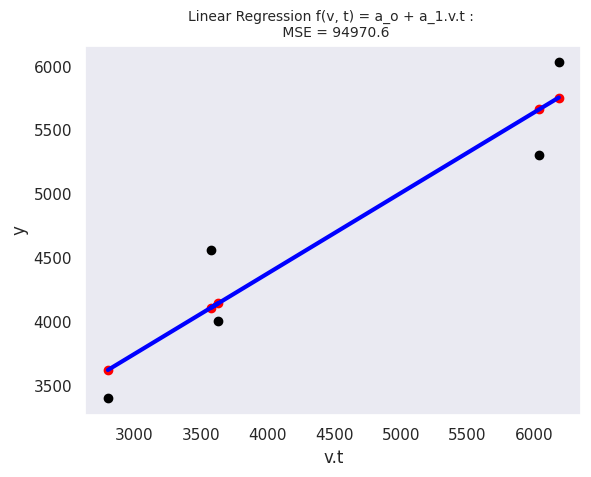

Coef =  [[0.62971639]]
Intercept =  [1860.85121463]
MSE_sk =  94970.6


In [63]:
# 1.1 to complete

import numpy as np
from scipy import linalg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


#Prepare the training data
Data = np.array ([[100, 121, 143, 159, 182], [28, 30, 25, 38, 34], [0.05100, 0.05463, 0.04559, 0.06920, 0.06192], [3401, 4004, 4561, 5308, 6032]], dtype=float)
Data = np.transpose(Data)
#print(Data)

# calc feature v*t
X_v_t = np.multiply(Data[:, 0], Data[:, 1]).reshape(Data[:, 2].size, 1)
#print(X_v_t)

#Create X matrix with ones
X = np.ones((len(X_v_t), 1), dtype=float)
X = np.concatenate((X, X_v_t), axis = 1)
#print(X)

#Create Y matrix
Y = Data[:, -1].reshape((len(X_v_t), 1))

print("Training:\n", X)
print("Label:\n", Y)

print(" Linear Regression ")

# Normal Equation: (X.t X)^-1 X.t Y
theta = np.linalg.inv(X.T @ X) @ X.T @ Y

print("Parameters theta =\n", theta)

# Singular Value Decomposition (SVD) of the matrix (X.t X)
M = X.T @ X
u, s, vh = np.linalg.svd(M, full_matrices=True)
print("SVD:\n s:", s )

# Precticted values
Y_predict = X @ theta

#Model's error - mean_squared_error (sklearn)
sum_MSE_f = 0
for i in range(len(Y)):
    sum_MSE_f +=  (Y[i][0] - Y_predict[i][0]) ** 2
MSE_f = sum_MSE_f/len(Y)
print("MSE_f = ", round(MSE_f,2))


### Plot
plt.scatter(X_v_t, Y, color="black")
plt.scatter(X_v_t, Y_predict, color="red")
plt.plot(X_v_t, Y_predict,  color="blue", linewidth=3)
plt.grid()

title = 'MSE = {}'.format(round(MSE_f,2))
plt.title("Linear Regression f(v, t) = a_o + a_1.v.t : \n " + title,
          fontsize=10)
plt.xlabel('v.t')
plt.ylabel('y')
plt.show()


# Using sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()
model.fit(X_v_t, Y)
Y_predict_sk = model.predict(X_v_t)

print("Coef = ", model.coef_)
print("Intercept = ", model.intercept_)

# Sklearn model's error
MSE_f_sk = mean_squared_error(Y, Y_predict)
print("MSE_sk = ", round(MSE_f_sk,2))


**1.2.** Estimate the values of the model $g(v, t) = a_o + a_1 v t + a_2 (v t)^2$. Use the sklearn to confirm the values that were obtained. Estimate the mean squared error for the model.


Training:
 [[1.0000000e+00 2.8000000e+03 7.8400000e+06]
 [1.0000000e+00 3.6300000e+03 1.3176900e+07]
 [1.0000000e+00 3.5750000e+03 1.2780625e+07]
 [1.0000000e+00 6.0420000e+03 3.6505764e+07]
 [1.0000000e+00 6.1880000e+03 3.8291344e+07]]
Label:
 [[3401.]
 [4004.]
 [4561.]
 [5308.]
 [6032.]]
 Linear Regression 
Parameters theta =
 [[-3.90298273e+02]
 [ 1.69954134e+00]
 [-1.15399906e-04]]
SVD:
 s: [3.19733860e+15 5.91016147e+06 9.73039434e-03]


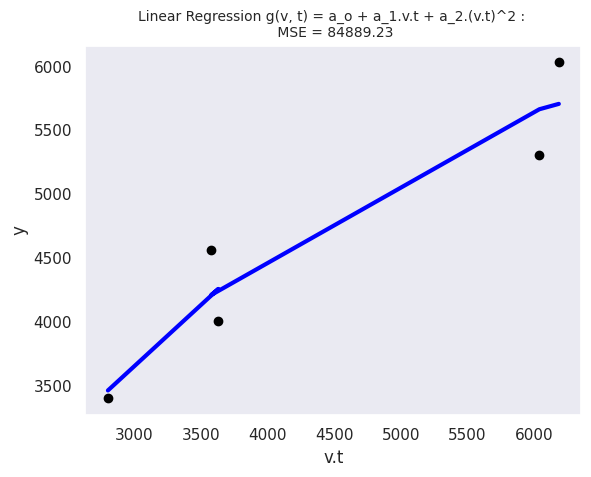

Coef =  [[ 1.69954134e+00 -1.15399906e-04]]
Intercept =  [-390.29827289]
MSE_sk =  84889.23


In [62]:
# 1.2 to complete

import numpy as np
from scipy import linalg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


#Prepare the training data
Data = np.array ([[100, 121, 143, 159, 182], [28, 30, 25, 38, 34], [0.05100, 0.05463, 0.04559, 0.06920, 0.06192], [3401, 4004, 4561, 5308, 6032]], dtype=float)
Data = np.transpose(Data)

# calc feature v*t
X_v_t         = np.multiply(Data[:, 0], Data[:, 1]).reshape(Data[:, 2].size, 1)
X_v_t_squared = X_v_t ** 2

#Create X matrix with ones: g(v, t) = a_o + a_1.v.t + a_2.(v.t)^2
X = np.ones((len(X_v_t), 1), dtype=float)
X = np.concatenate((X, X_v_t), axis = 1)
X = np.concatenate((X, X_v_t_squared), axis = 1)

#Create Y matrix
Y = Data[:, -1].reshape((len(X_v_t), 1))

print("Training:\n", X)
print("Label:\n", Y)

print(" Linear Regression ")

# Normal Equation: (X.t X)^-1 X.t Y
theta = np.linalg.inv(X.T @ X) @ X.T @ Y

print("Parameters theta =\n", theta)

# SVD of the matrix (X.t X)
M = X.T @ X
u, s, vh = np.linalg.svd(M, full_matrices=True)
print("SVD:\n s:", s )

# Precticted values
Y_predict = X @ theta

#Model's error
MSE_g = mean_squared_error(Y, Y_predict)

### Plot
plt.scatter(X_v_t, Y, color="black")
plt.plot(X_v_t, Y_predict,  color="blue", linewidth=3)
plt.grid()

title = 'MSE = {}'.format(round(MSE_g,2))
plt.title("Linear Regression g(v, t) = a_o + a_1.v.t + a_2.(v.t)^2 : \n " + title,
          fontsize=10)
plt.xlabel('v.t')
plt.ylabel('y')
plt.show()


# Using sklearn
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

nb_degree = 2
polynomial_features = PolynomialFeatures(degree = nb_degree)
X_TRANSF = polynomial_features.fit_transform(X_v_t)

model = linear_model.LinearRegression()
model.fit(X_TRANSF[:,[1,2]], Y)
Y_predict_sk = model.predict(X_TRANSF[:,[1,2]])

print("Coef = ", model.coef_)
print("Intercept = ", model.intercept_)

# Sklearn model's error
MSE_g_sk = mean_squared_error(Y, Y_predict)
print("MSE_sk = ", round(MSE_g_sk,2))

**1.3.** Consider the WindSpeed feature that is provided by the Sentinel Satellite. The model $h(v, w, t) = a_o + a_1vt + a_2 w t$ has an unique solution? Please justify.

Training:
 [[1.000000e+00 2.800000e+03 5.100000e+00]
 [1.000000e+00 3.630000e+03 6.610230e+00]
 [1.000000e+00 3.575000e+03 6.519370e+00]
 [1.000000e+00 6.042000e+03 1.100280e+01]
 [1.000000e+00 6.188000e+03 1.126944e+01]]
Label:
 [[3401.]
 [4004.]
 [4561.]
 [5308.]
 [6032.]]
 Linear Regression 
Parameters theta =
 [[ 1420.30169777]
 [ -135.44139401]
 [74755.71201783]]
SVD:
 s: [1.08594998e+08 4.47348305e-01 5.47224762e-05]


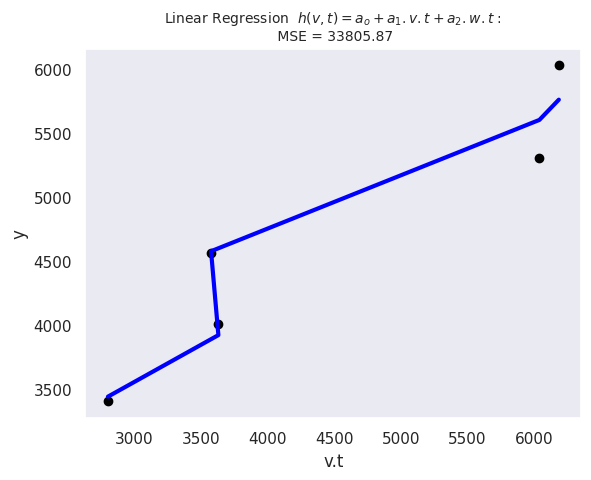

Coef =  [[ -135.44139394 74755.71198008]]
Intercept =  [1420.301698]


In [66]:
# 1.3 to complete

import numpy as np
from scipy import linalg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


#Prepare the training data
Data = np.array ([[100, 121, 143, 159, 182], [28, 30, 25, 38, 34], [0.05100, 0.05463, 0.04559, 0.06920, 0.06192], [3401, 4004, 4561, 5308, 6032]], dtype=float)
Data = np.transpose(Data)

# calc feature v*t
X_v_t = np.multiply(Data[:, 0], Data[:, 1]).reshape(Data[:, 2].size, 1)

# calc feature w*t
X_w_t = np.multiply(Data[:, 0], Data[:, 2]).reshape(Data[:, 2].size, 1)

#Create X matrix with ones:  $h(v, t) = a_o + a_1.v.t + a_2.w.t$
X = np.ones((len(X_v_t), 1), dtype=float)
X = np.concatenate((X, X_v_t), axis = 1)
X = np.concatenate((X, X_w_t), axis = 1)

#Create Y matrix
Y = Data[:, -1].reshape((len(X_v_t), 1))

print("Training:\n", X)
print("Label:\n", Y)

print(" Linear Regression ")

# Normal Equation: (X.t X)^-1 X.t Y
theta = linalg.inv(X.T @ X) @ X.T @ Y
print("Parameters theta =\n", theta)

# SVD of the matrix (X.t X)  #Singular Value Decomposition
M = X.T @ X
u, s, vh = np.linalg.svd(M, full_matrices=True)
print("SVD:\n s:", s )

# Precticted values
Y_predict = X @ theta

#Model's error
MSE = mean_squared_error(Y, Y_predict)

### Plot
plt.scatter(X_v_t, Y, color="black")
plt.plot(X_v_t, Y_predict,  color="blue", linewidth=3)
plt.grid()

title = 'MSE = {}'.format(round(MSE,2))
plt.title("Linear Regression  $h(v, t) = a_o + a_1.v.t + a_2.w.t$ : \n " + title,
          fontsize=10)
plt.xlabel('v.t')
plt.ylabel('y')
plt.show()


# Using sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()
X = X_v_t
X = np.concatenate((X, X_w_t), axis = 1)
model.fit(X, Y)
print("Coef = ", model.coef_)
print("Intercept = ", model.intercept_)

**1.4.** Estimate the previous model using the stochastic gradient descent.

In [8]:
# 1.4 to complete

import numpy as np
from scipy import linalg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Prepare the training data
Data = np.array ([[100, 121, 143, 159, 182], [28, 30, 25, 38, 34], [0.05100, 0.05463, 0.04559, 0.06920, 0.06192], [3401, 4004, 4561, 5308, 6032]], dtype=float)
Data = np.transpose(Data)

# calc feature v*t
X_v_t = np.multiply(Data[:, 0], Data[:, 1]).reshape(Data[:, 2].size, 1)

# calc feature w*t
X_w_t = np.multiply(Data[:, 0], Data[:, 2]).reshape(Data[:, 2].size, 1)

#Create X matrix with ones:  $h(v, t) = a_o + a_1.v.t + a_2.w.t$
X_train = np.ones((len(X_v_t), 1), dtype=float)
X_train = np.concatenate((X_train, X_v_t), axis = 1)
X_train = np.concatenate((X_train, X_w_t), axis = 1)

#Create Y matrix
Y_train = Data[:, -1].reshape((len(X_v_t), 1))

# scaler for normalization
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X = scaler_x.fit_transform(X_train)
Y = scaler_y.fit_transform(Y_train)

print("Training:\n", X)
print("Label:\n", Y)

print(" ****** SGD Regression ****** ")

lrate     = 0.005
n_epochs  = 300
n_samples = X.shape[0]

#Initialization of theta
theta = np.random.rand(X.shape[1], 1)

for itr in range(n_epochs):
    #In stochastic gradient descent, you calculate the gradient using just a random small part of the observations instead of all of them.
    isample = np.random.randint(0, X.shape[0])
    print("isample",isample)
    Y_predict = X[isample, :] @ theta 

    Y_residuals = np.subtract(Y_predict, Y[isample])

    #mse
    Loss = (Y_residuals**2).mean()

    #grad
    grad_loss = 2 * ((X[isample, :].T @ Y_predict) - X[isample, :].T @ Y[isample])
    print("grad_loss",grad_loss)    
    grad_loss = np.reshape(grad_loss, (X.shape[1], 1))
    #print(grad_loss.shape)
    theta = theta - lrate * grad_loss

    print('Iter i:', itr, '  Loss:', Loss)


Y_predict = scaler_y.inverse_transform(X.dot(theta)) #reverse transformation


#Plot training set
plt.scatter(X_v_t, Y_train)
#Plot regression line
plt.plot(X_v_t, Y_predict,  'r', label='SGDRegressor');
plt.xlabel('v.t')
plt.ylabel('y')
plt.legend()
plt.title('Stochastic Gradient Descent')


#Using sklearn
from sklearn.linear_model import SGDRegressor
model_sgd = SGDRegressor(learning_rate='constant', eta0 = lrate, alpha=0, early_stopping=False, max_iter=n_epochs, tol=1e-9)

X = X[:, 1:]

# Fit model based on data
model_sgd.fit(X , Y.reshape(n_samples))

# Use the model
yfit_sgd = model_sgd.predict(X)
yfit_sgd = scaler_y.inverse_transform(yfit_sgd.reshape(-1, 1)) #reverse transformation

#Plot regression line
plt.plot(X_v_t, yfit_sgd,  'y', label='sklearn SGDRegressor');
plt.legend()
plt.title('Stochastic Gradient Descent')

Training:
 [[0.         0.         0.        ]
 [0.         0.24498229 0.24479207]
 [0.         0.22874852 0.23006464]
 [0.         0.95690673 0.95678052]
 [0.         1.         1.        ]]
Label:
 [[0.        ]
 [0.22919042]
 [0.440897  ]
 [0.72481946]
 [1.        ]]
 ****** SGD Regression ****** 
isample 4


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 3)

## **Activity 2**

Derive the least squares optimal solution for the  regression case with model
$$
f_\theta(x) = \theta^\top\phi(x)
$$
where $\theta = [\theta_0, \theta_1]^\top$, $\phi(x)= [\phi_0(x), \phi_1(x)]^\top$, and $x\in\mathbb{R}^d$. In other words, apply the (necessary) optimality condition to
$$
\min_{\theta} \sum_{i=1}^N \big(y_i - \theta^\top\phi(x_i)\big)^2
$$